In [ ]:
import pandas as pd
df = pd.read_csv('/content/health_data_10000_chunk - health_data_10000_chunk.csv')
df.head()

,Height (cm),Weight (kg),BMI,Medical conditions,Medications in use,Residential Address,Previous gastrointestinal issues,Family history of diseases,Previous surgeries,Previous therapies,...,Current status of microbiota,Intestinal health indicators,Comparison with optimal values,Supplement Plan - Recommended products,Supplement Plan - Dosages and timings,Supplement Plan - Intake tracking,Supplement Plan - Automatic reminders,Meal Plan - Recommended/avoided foods,Weekly menu,Personalized recipes
0,173,120,40.1,"Diabetes, Anemia","Aspirin, Levothyroxine","17761 Coleman Coves Suite 307\nWest Ryan, FL 8...",True,"Cancer, Diabetes",Appendectomy,Chiropractic,...,At Risk,Optimal,84.68,"Vitamin D, Prebiotic","Twice daily, Once daily",True,True,"Eggs, Bread, Broccoli","Steak, Rice, Salad","Rice Pudding, Vegan Salad"
1,183,110,32.8,"Asthma, Anemia","Lisinopril, Aspirin","11610 Thompson Trail\nSouth Steven, CA 97229",False,"Cancer, Heart disease",Knee surgery,Cognitive Behavioral Therapy,...,Optimal,Suboptimal,70.68,"Prebiotic, Vitamin D","Once daily, After meals",False,False,"Broccoli, Eggs, Fish","Salad, Pasta, Rice","Rice Pudding, Vegan Salad"
2,160,111,43.4,"Hypertension, Asthma","Aspirin, Lisinopril","89841 Nguyen Station\nNew Jennafurt, WA 05070",False,"Cancer, Diabetes",Knee surgery,Physical therapy,...,Optimal,At Risk,80.09,"Probiotic, Magnesium","Once daily, After meals",False,True,"Bread, Eggs, Broccoli","Steak, Salad, Pasta","Rice Pudding, Grilled Chicken"
3,177,75,23.9,"Anemia, Asthma","Metformin, Lisinopril","194 Adam Alley\nRoachville, CO 73756",True,"Hypertension, Diabetes",Knee surgery,Chiropractic,...,Optimal,At Risk,63.77,"Magnesium, Probiotic","Once daily, Twice daily",False,True,"Bread, Fish, Broccoli","Pasta, Rice, Steak","Fruit Smoothie, Grilled Chicken"
4,170,97,33.6,"Hypertension, Asthma","Lisinopril, Insulin","420 Griffin Rest Suite 963\nNew Allisonburgh, ...",True,"Heart disease, Hypertension",Appendectomy,Cognitive Behavioral Therapy,...,Optimal,Suboptimal,76.98,"Omega-3, Probiotic","Twice daily, After meals",False,False,"Bread, Chicken, Broccoli","Steak, Pasta, Salad","Grilled Chicken, Fruit Smoothie"


In [ ]:
df.shape

(10000, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Height (cm)                                       10000 non-null  int64  
 1   Weight (kg)                                       10000 non-null  int64  
 2   BMI                                               10000 non-null  float64
 3   Medical conditions                                10000 non-null  object 
 4   Medications in use                                10000 non-null  object 
 5   Residential Address                               10000 non-null  object 
 6   Previous gastrointestinal issues                  10000 non-null  bool   
 7   Family history of diseases                        10000 non-null  object 
 8   Previous surgeries                                10000 non-null  object 
 9   Previous therapies

# Step-1: Exploratory Data Analysis

### Visualize the distribution of the target variable

In [ ]:
df['Current status of microbiota'].value_counts()

,count
Current status of microbiota,
Suboptimal,4672
Optimal,4554
At Risk,774


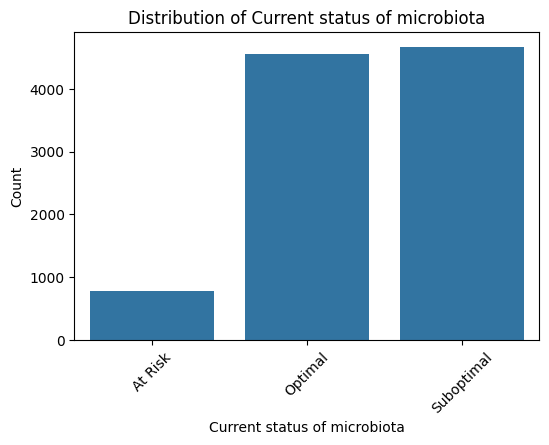

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Current status of microbiota', data=df)
plt.title('Distribution of Current status of microbiota')
plt.xlabel('Current status of microbiota')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Decision:
- 3 classes (At risk, optimal and suboptimal)
- dataset is not well balanced

### Analyze feature correlations (e.g., BMI vs. diet)

In [ ]:
import pandas as pd
def factorize_strings(df):
    factorized_df = df.copy()
    string_columns = factorized_df.select_dtypes(include=['object', 'bool']).columns
    factorization_dict = {}

    for col in string_columns:
        factorized_df[col], uniques = pd.factorize(factorized_df[col])
        factorization_dict[col] = {i: val for i, val in enumerate(uniques)}
    return factorized_df, factorization_dict

In [ ]:
factorized_df, factorization_dict = factorize_strings(df)

In [ ]:
factorized_df.head()

,Height (cm),Weight (kg),BMI,Medical conditions,Medications in use,Residential Address,Previous gastrointestinal issues,Family history of diseases,Previous surgeries,Previous therapies,...,Current status of microbiota,Intestinal health indicators,Comparison with optimal values,Supplement Plan - Recommended products,Supplement Plan - Dosages and timings,Supplement Plan - Intake tracking,Supplement Plan - Automatic reminders,Meal Plan - Recommended/avoided foods,Weekly menu,Personalized recipes
0,173,120,40.1,0,0,0,0,0,0,0,...,0,0,84.68,0,0,0,0,0,0,0
1,183,110,32.8,1,1,1,1,1,1,1,...,1,1,70.68,1,1,1,1,1,1,0
2,160,111,43.4,2,2,2,1,0,1,2,...,1,2,80.09,2,1,1,0,2,2,1
3,177,75,23.9,3,3,3,0,2,1,0,...,1,2,63.77,3,2,1,0,3,3,2
4,170,97,33.6,2,4,4,0,3,0,1,...,1,1,76.98,4,3,1,1,4,4,3


#### Correlation with the demographic features and target variable:

In [ ]:
target = "Current status of microbiota"

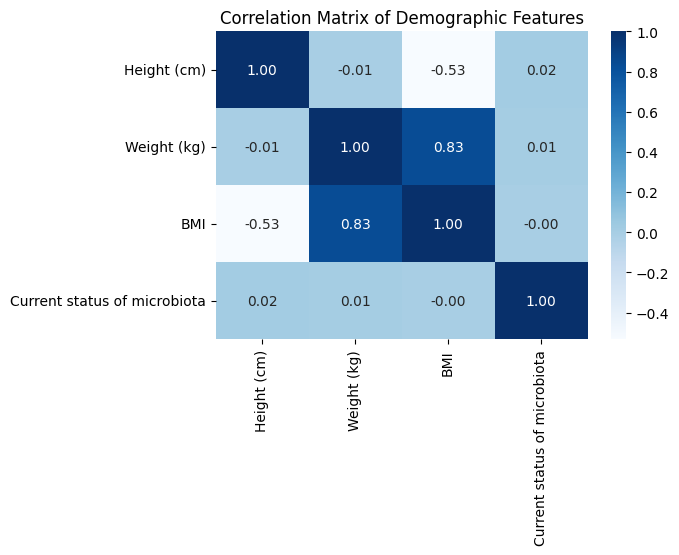

In [ ]:
demographic_columns = ['Height (cm)', 'Weight (kg)', 'BMI', target]
correlation_matrix = factorized_df[demographic_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Demographic Features')
plt.show()

Decision:
- Our target variable has a negligible correlation with the demographic features
- Height and BMI has a moderate negative correlation
- Weight and BMI has a strong positive correlation

#### Correlation with the Medical history features and target variable:

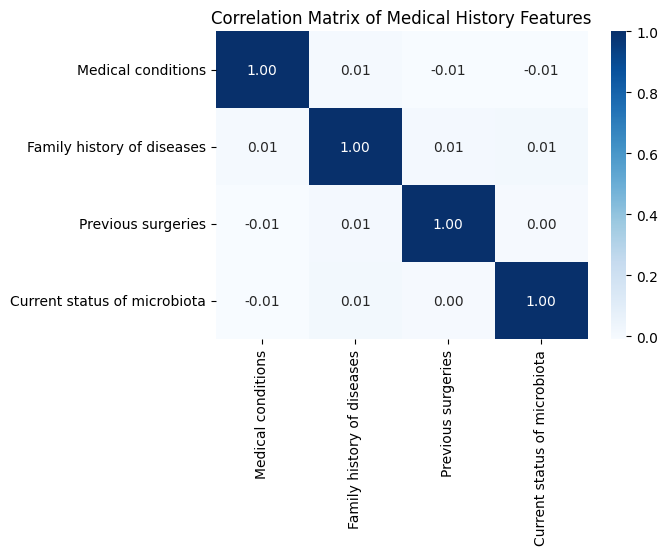

In [ ]:
selected_columns = ['Medical conditions', 'Family history of diseases', 'Previous surgeries', target]
correlation_matrix = factorized_df[selected_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Medical History Features')
plt.show()

No medical history feature has a good correlation with each other and with the target variable.

Lets break down the multi-value columns of medical history in search of better correlation.

In [ ]:
unique_medical_conditions = set()

for conditions in df['Medical conditions'].dropna():
    for condition in conditions.split(','):
        unique_medical_conditions.add(condition.strip())

unique_medical_conditions

{'Anemia', 'Asthma', 'Diabetes', 'Hypertension', 'Hyperthyroidism', 'Obesity'}

In [ ]:
for condition in unique_medical_conditions:
    factorized_df[condition] = df['Medical conditions'].str.contains(condition, na=False).astype(int)

['Anemia', 'Diabetes', 'Hyperthyroidism', 'Asthma', 'Obesity', 'Hypertension', 'Current status of microbiota']


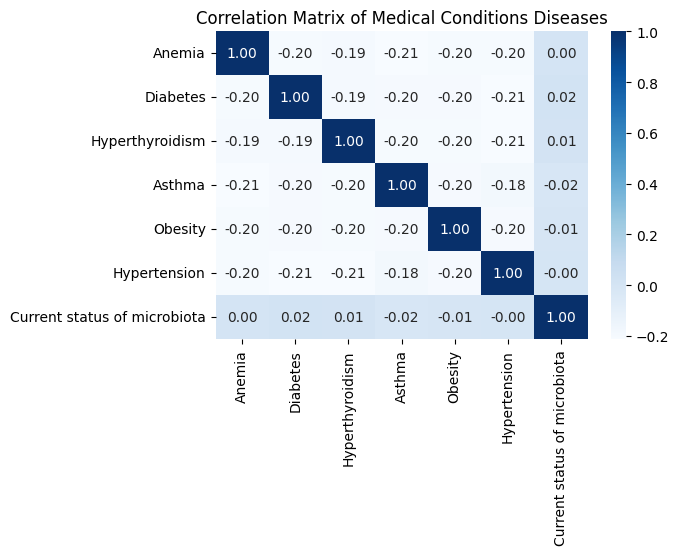

In [ ]:
selected_columns = list(unique_medical_conditions)
selected_columns.append(target)
print(selected_columns)
correlation_matrix = factorized_df[selected_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Medical Conditions Diseases')
plt.show()

Decisions:
- Weak Negative Correlations Among Diseases
- No Significant Relationship with Microbiota

In [ ]:
unique_family_history_diseases = set()

for conditions in df['Family history of diseases'].dropna():
    for condition in conditions.split(','):
        unique_family_history_diseases.add(condition.strip())

unique_family_history_diseases

{'Cancer', 'Diabetes', 'Heart disease', 'Hypertension'}

In [ ]:
for condition in unique_family_history_diseases:
    factorized_df["FHD_"+condition] = df['Family history of diseases'].str.contains(condition, na=False).astype(int)

In [ ]:
selected_columns = []
for disease in unique_family_history_diseases:
    selected_columns.append("FHD_"+disease)

selected_columns.append(target)
selected_columns

['FHD_Heart disease',
 'FHD_Cancer',
 'FHD_Diabetes',
 'FHD_Hypertension',
 'Current status of microbiota']

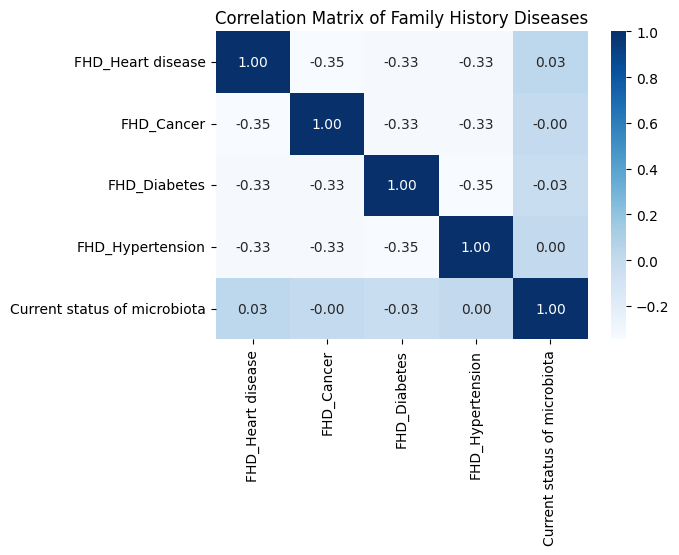

In [ ]:
correlation_matrix = factorized_df[selected_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Family History Diseases')
plt.show()

Decision:
- Family history diseases have weak correlation among them
- No family history disease have correlation with microbiota

#### Correlation with the Lifestyle features and target variable

In [ ]:
factorized_df[['Smoking Status', 'Smoking Quantity']] = df['Smoking status (Yes/No, quantity)'].str.split(',', expand=True)

factorized_df['Smoking Quantity'] = pd.to_numeric(factorized_df['Smoking Quantity'], errors='coerce')
factorized_df['Smoking Status'], uniques = pd.factorize(factorized_df['Smoking Status'])

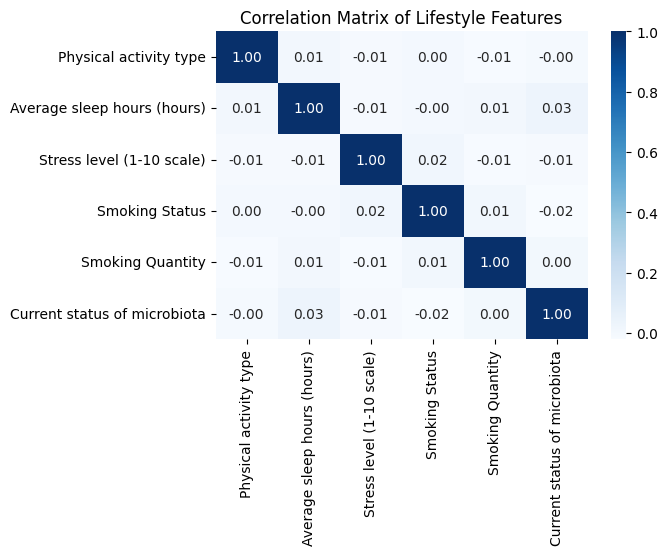

In [ ]:
selected_columns = ['Physical activity type',
                    'Average sleep hours (hours)',
                    'Stress level (1-10 scale)',
                    'Smoking Status',
                    'Smoking Quantity',
                    target]
correlation_matrix = factorized_df[selected_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Lifestyle Features')
plt.show()

Decision: No Lifestyle features have correlation with microbiota

#### Correlation with the Diet features and target variable

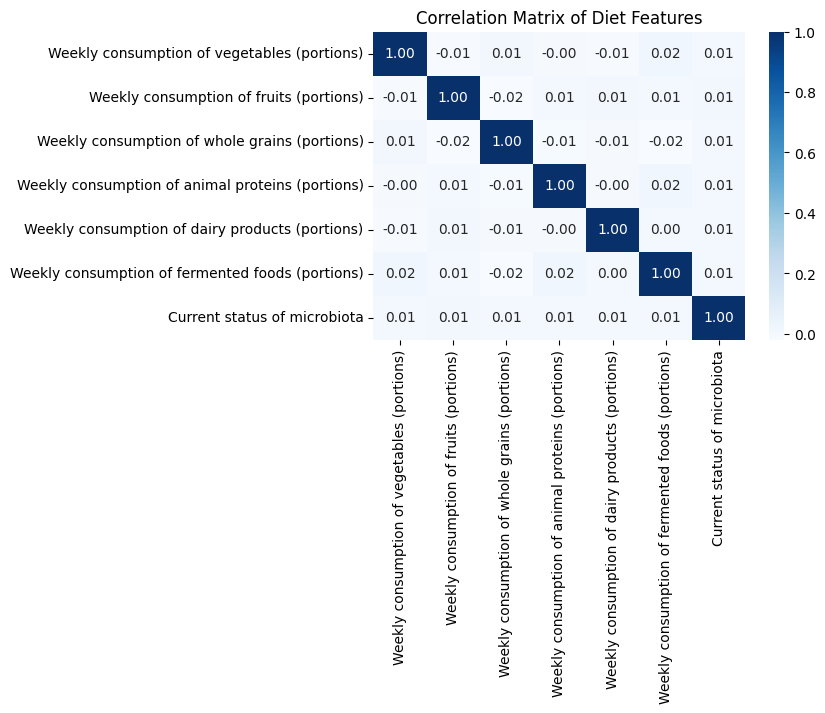

In [ ]:
selected_columns = ['Weekly consumption of vegetables (portions)',
                    'Weekly consumption of fruits (portions)',
                    'Weekly consumption of whole grains (portions)',
                    'Weekly consumption of animal proteins (portions)',
                    'Weekly consumption of dairy products (portions)',
                    'Weekly consumption of fermented foods (portions)',
                    target]
correlation_matrix = factorized_df[selected_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Diet Features')
plt.show()

#### Correlation of the Gastrointestinal Health features and target variable

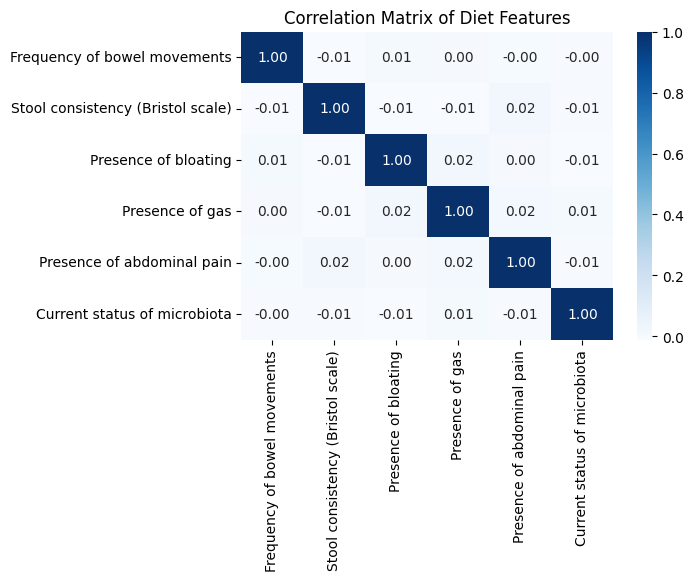

In [ ]:
selected_columns = ['Frequency of bowel movements',
                    'Stool consistency (Bristol scale)',
                    'Presence of bloating',
                    'Presence of gas',
                    'Presence of abdominal pain',
                    target]
correlation_matrix = factorized_df[selected_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of Diet Features')
plt.show()

In [ ]:
key_features = ['Height (cm)', 'Weight (kg)', 'BMI', 'Anemia', 'Asthma', 'Diabetes', 'Hypertension', 'Hyperthyroidism',
                'Obesity', 'FHD_Hypertension', 'FHD_Diabetes', 'FHD_Cancer', 'FHD_Heart disease', 'Previous surgeries',
                'Physical activity type', 'Average sleep hours (hours)', 'Stress level (1-10 scale)', 'Smoking Status',
                'Smoking Quantity', 'Weekly consumption of vegetables (portions)', 'Weekly consumption of fruits (portions)',
                'Weekly consumption of whole grains (portions)', 'Weekly consumption of animal proteins (portions)',
                'Weekly consumption of dairy products (portions)', 'Weekly consumption of fermented foods (portions)',
                'Frequency of bowel movements', 'Stool consistency (Bristol scale)', 'Presence of bloating',
                'Presence of gas', 'Presence of abdominal pain', target]

In [ ]:
key_df = factorized_df[key_features]

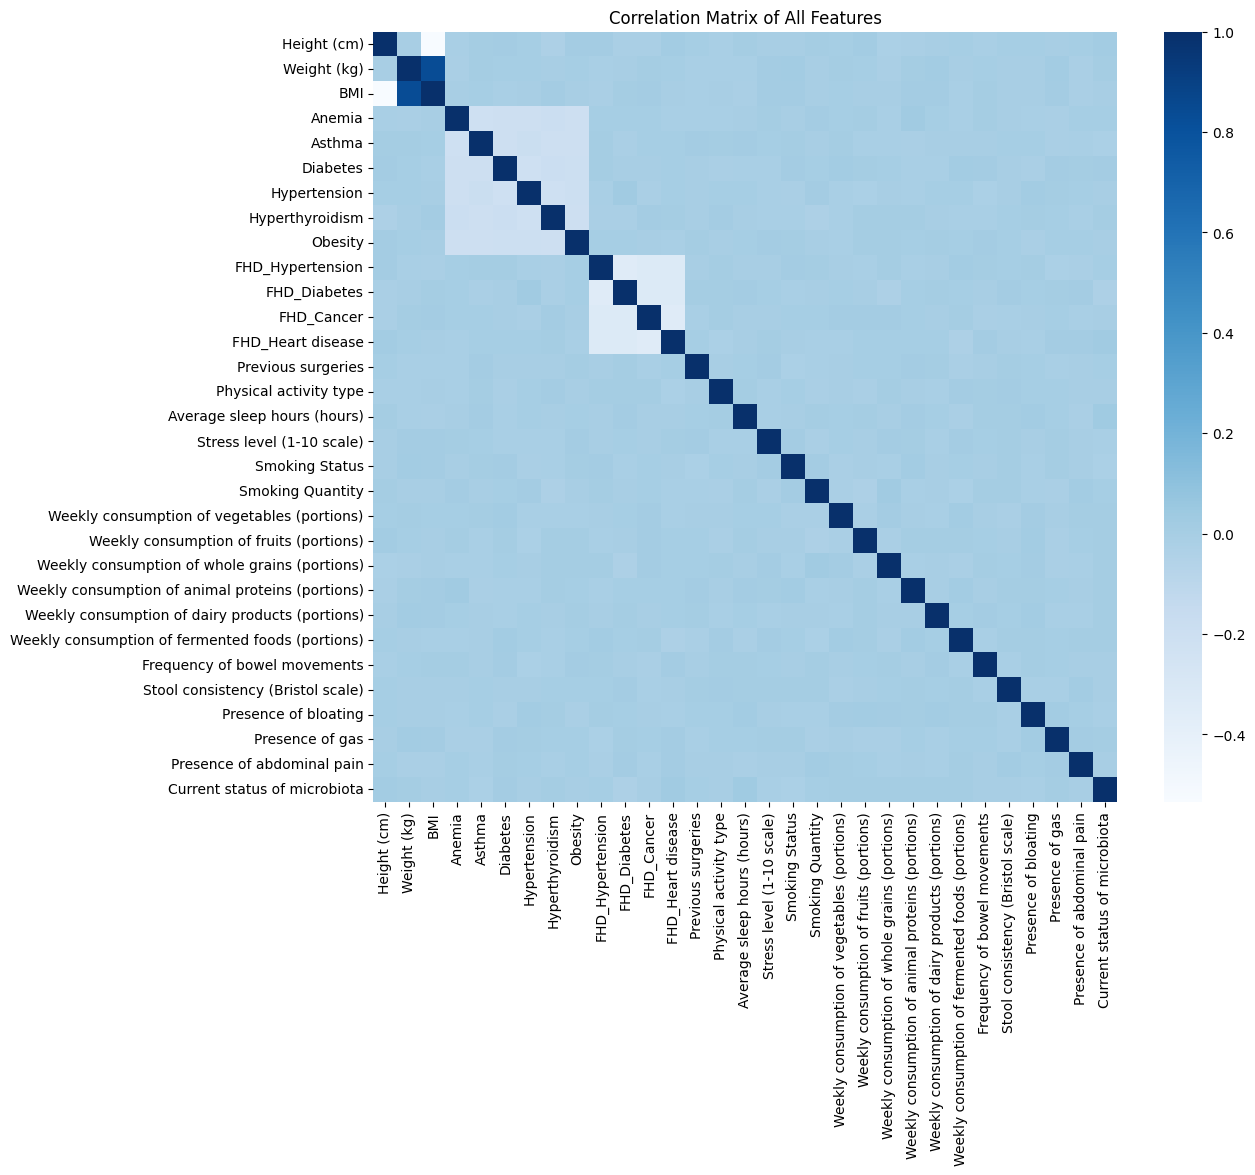

In [ ]:
correlation_matrix = key_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues') # annot=False removes values
plt.title('Correlation Matrix of All Features')
plt.show()


### Detect outliers and missing values

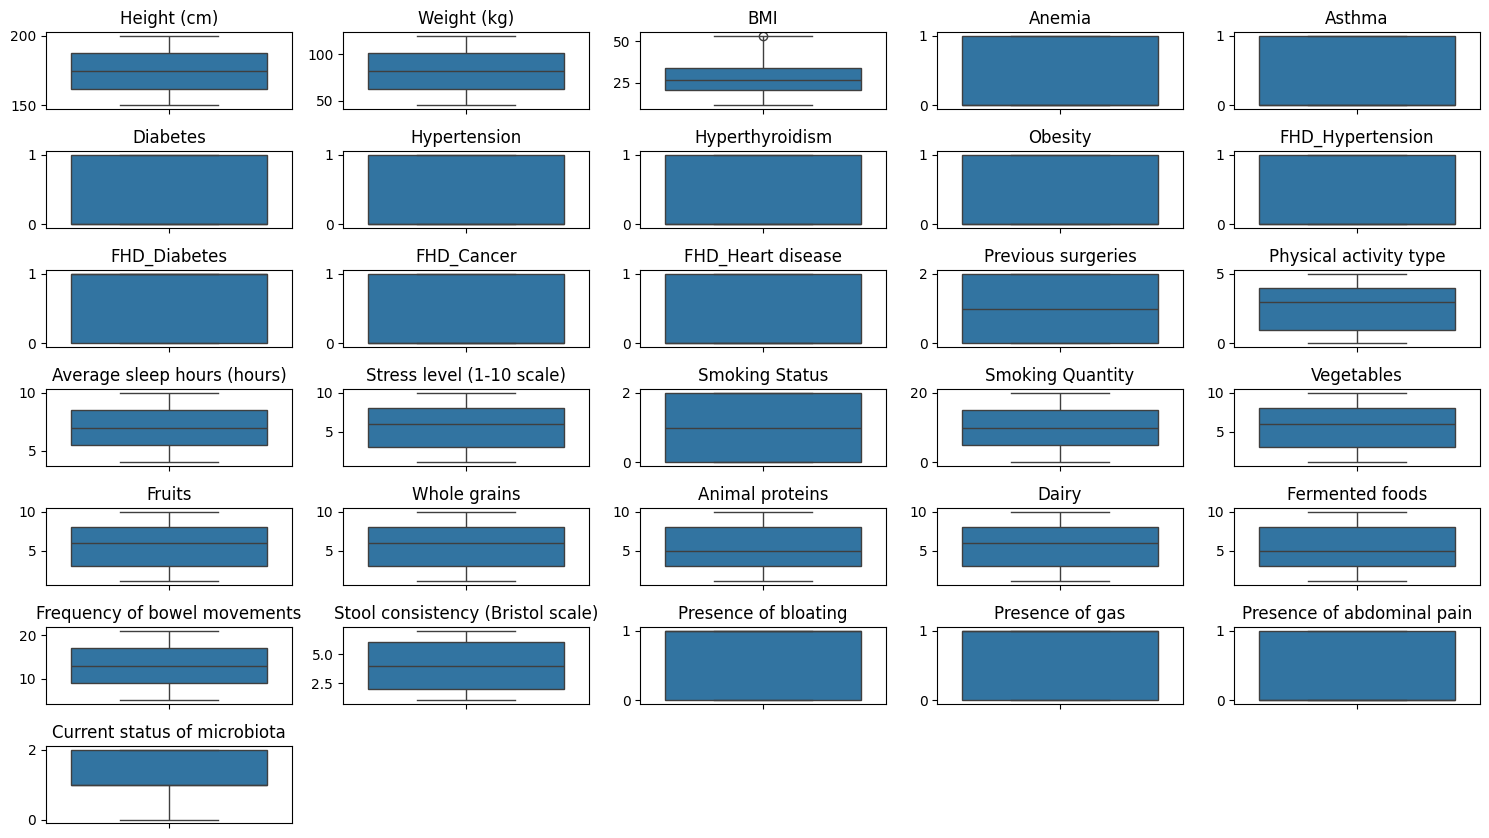

In [ ]:
key_df = key_df.rename(columns={
    'Weekly consumption of vegetables (portions)': 'Vegetables',
    'Weekly consumption of fruits (portions)': 'Fruits',
    'Weekly consumption of whole grains (portions)': 'Whole grains',
    'Weekly consumption of animal proteins (portions)': 'Animal proteins',
    'Weekly consumption of dairy products (portions)': 'Dairy',
    'Weekly consumption of fermented foods (portions)': 'Fermented foods'
})

plt.figure(figsize=(15, 12))
for i, col in enumerate(key_df.columns):
    plt.subplot(10, 5, i + 1)
    sns.boxplot(y=key_df[col])
    plt.title(col)
    plt.ylabel('')
    plt.tight_layout()
plt.show()


No outliers

In [ ]:
key_df.isna().sum()

,0
Height (cm),0
Weight (kg),0
BMI,0
Anemia,0
Asthma,0
Diabetes,0
Hypertension,0
Hyperthyroidism,0
Obesity,0
FHD_Hypertension,0


Smoking Quantity column contains missing values, Which are actually the values where Smoking status is No. So, Smoking quantity in these cases should be 0.

In [ ]:
key_df = key_df.fillna(0)

In [ ]:
key_df.isna().sum().sum()

np.int64(0)

## Step 2: Data Preprocessing

Currently data contain no missing values, and the categorical variables has been encoded.

In [ ]:
X = factorized_df.drop(columns=[target])
y = factorized_df[target]

Though the target class is well balanced, we will increase them a little using SMOTE

In [ ]:
y.value_counts()

,count
Current status of microbiota,
2,4672
1,4554
0,774


In [ ]:
factorization_dict[target]

{0: 'At Risk', 1: 'Optimal', 2: 'Suboptimal'}

In [ ]:
X = X.fillna(0)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

desired_counts = {2: 5500, 1: 5000, 0: 2000}

smote = SMOTE(sampling_strategy=desired_counts, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.shape

(12500,)

In [ ]:
y_resampled.value_counts()

,count
Current status of microbiota,
2,5500
1,5000
0,2000


In [ ]:
X = X_resampled
y = y_resampled

## Step 3: Feature Engineering

In [ ]:
X.columns

Index(['Height (cm)', 'Weight (kg)', 'BMI', 'Medical conditions',
       'Medications in use', 'Residential Address',
       'Previous gastrointestinal issues', 'Family history of diseases',
       'Previous surgeries', 'Previous therapies',
       'Frequency of bowel movements', 'Stool consistency (Bristol scale)',
       'Presence of bloating', 'Presence of gas', 'Presence of abdominal pain',
       'Difficult digestion', 'Known intolerances', 'Food allergies',
       'Current diet', 'Weekly consumption of vegetables (portions)',
       'Weekly consumption of fruits (portions)',
       'Weekly consumption of whole grains (portions)',
       'Weekly consumption of animal proteins (portions)',
       'Weekly consumption of plant proteins (portions)',
       'Weekly consumption of dairy products (portions)',
       'Weekly consumption of fermented foods (portions)',
       'Daily water intake (liters)', 'Alcohol consumption', 'Meal times',
       'Physical activity type',
       'Weekly

In [ ]:
X = X.rename(columns={
    'Weekly consumption of vegetables (portions)': 'Vegetables',
    'Weekly consumption of fruits (portions)': 'Fruits',
    'Weekly consumption of whole grains (portions)': 'Whole grains',
    'Weekly consumption of animal proteins (portions)': 'Animal proteins',
    'Weekly consumption of dairy products (portions)': 'Dairy',
    'Weekly consumption of fermented foods (portions)': 'Fermented foods'
})

### Derive composite metrics

Plant-to-Animal Protein Ratio = (Vegetables + Whole Grains)/(Animal Proteins + Dairy + n)

n is a small value that prevents division by zero error.

In [ ]:
X['Plant-to-Animal Protein Ratio'] = (X['Vegetables'] + X['Whole grains']) / (X['Animal proteins'] + X['Dairy'] + 1e-10)

Gut Health Score = Frequency of bowel movement + stool consistency + (1 - bloating) + (1 - gas) + (1 - abdominal pain)

In [ ]:
X['Gut Health Score'] = X['Frequency of bowel movements'] + X['Stool consistency (Bristol scale)'] + (1 - X['Presence of bloating']) + (1 - X['Presence of gas']) + (1 - X['Presence of abdominal pain'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Step 4: Model Creation

### Baseline Models: Logistic Regression, Random Forest, XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def plot_roc_auc(y_true, y_pred, model):
  y_true = y_test

  y_prob = model.predict_proba(X_test)

  class_names = model.classes_

  y_true_bin = label_binarize(y_true, classes=class_names)
  n_classes = len(class_names)

  plt.figure(figsize=(6, 4))

  for i in range(n_classes):
      fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], 'k--', lw=2)

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate', fontsize=12)
  plt.ylabel('True Positive Rate', fontsize=12)
  plt.title('ROC Curve', fontsize=14)
  plt.legend(loc='lower right', fontsize=10)
  plt.tight_layout()
  plt.show()

#### Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train1, y_train1)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = model.predict(X_test1)

In [ ]:
print(classification_report(y_test1, y_pred))
print(f"Accuracy: {accuracy_score(y_test1, y_pred)}")

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       408
           1       0.49      0.39      0.43      1022
           2       0.50      0.57      0.53      1070

    accuracy                           0.53      2500
   macro avg       0.56      0.58      0.57      2500
weighted avg       0.53      0.53      0.52      2500

Accuracy: 0.5316


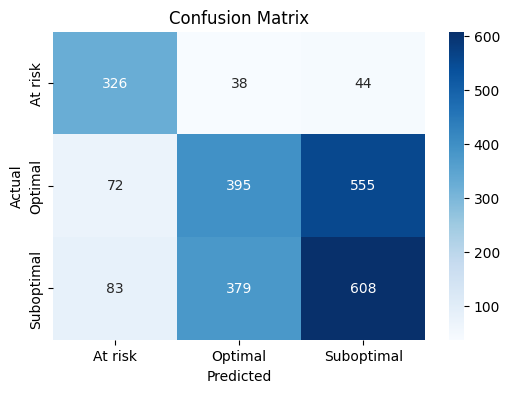

In [ ]:
cm = confusion_matrix(y_test1, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['At risk', 'Optimal', 'Suboptimal'],
            yticklabels=['At risk', 'Optimal', 'Suboptimal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

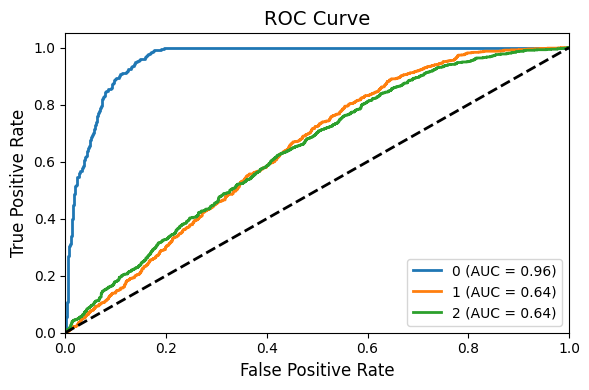

In [ ]:
plot_roc_auc(y_test1, y_pred, model)

#### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=15, min_samples_split=8)
rf_model.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=500,
                       random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test1)

In [ ]:
print(classification_report(y_test1, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test1, rf_predictions)}")

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       408
           1       0.54      0.29      0.38      1022
           2       0.52      0.72      0.61      1070

    accuracy                           0.57      2500
   macro avg       0.60      0.63      0.60      2500
weighted avg       0.57      0.57      0.55      2500

Accuracy: 0.5696


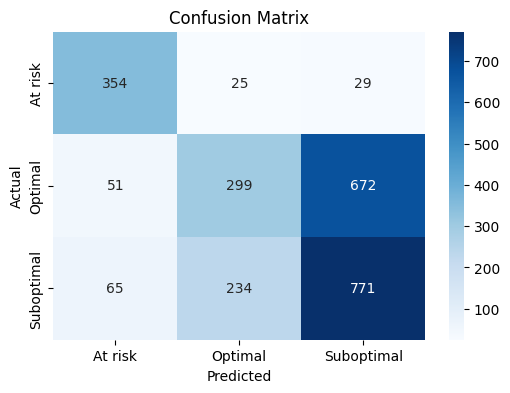

In [ ]:
cm = confusion_matrix(y_test1, rf_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['At risk', 'Optimal', 'Suboptimal'],
            yticklabels=['At risk', 'Optimal', 'Suboptimal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

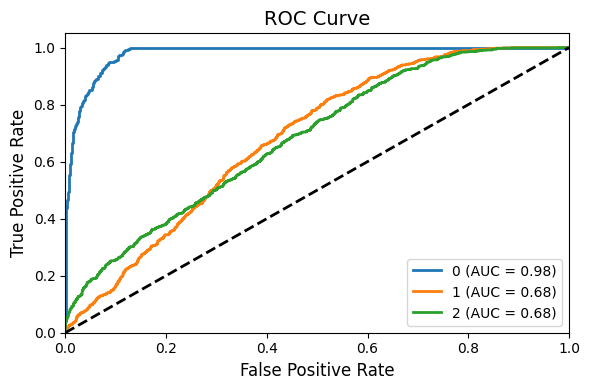

In [ ]:
plot_roc_auc(y_test1, rf_predictions, rf_model)

#### XgBoost

In [ ]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_estimators=800,
    max_depth=15,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.9
)

xgb_model.fit(X_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_predictions = xgb_model.predict(X_test1)

In [ ]:
print(classification_report(y_test1, xgb_predictions))
print(f"Accuracy: {accuracy_score(y_test1, xgb_predictions)}")

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       408
           1       0.54      0.47      0.50      1022
           2       0.55      0.57      0.56      1070

    accuracy                           0.58      2500
   macro avg       0.60      0.64      0.62      2500
weighted avg       0.57      0.58      0.57      2500

Accuracy: 0.5796


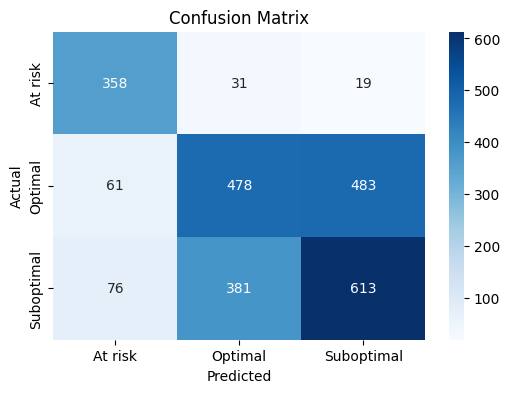

In [ ]:
cm = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['At risk', 'Optimal', 'Suboptimal'],
            yticklabels=['At risk', 'Optimal', 'Suboptimal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

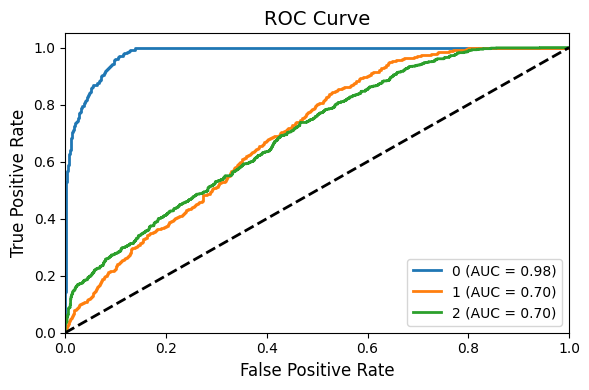

In [ ]:
plot_roc_auc(y_test1, xgb_predictions, xgb_model)

### SHAP Analysis

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap_array = np.array(shap_values)
shap_array = shap_values.transpose(2, 0, 1)

mean_abs_shap = np.abs(shap_array).mean(axis=(0, 1))

shap_df = pd.DataFrame({
    "feature": X_train.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

<ipython-input-315-9bdd0830fcc9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


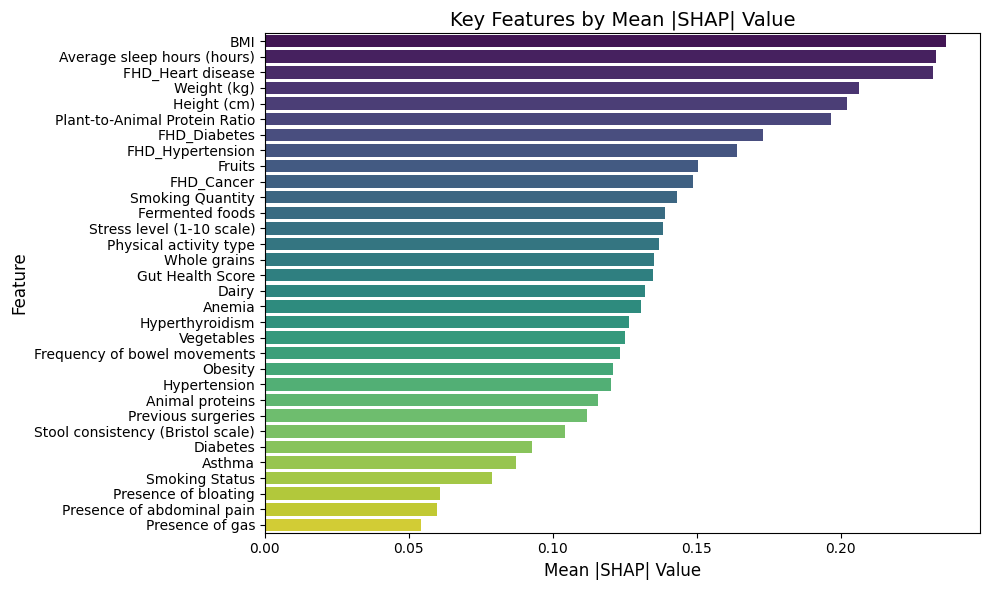

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="mean_abs_shap",
    y="feature",
    data=shap_df,
    palette="viridis"
)
plt.title("Key Features by Mean |SHAP| Value", fontsize=14)
plt.xlabel("Mean |SHAP| Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

#### SHAP based composite features

In [ ]:
def shap_weights_feature(li):
  shap_weights = shap_df.set_index("feature").loc[li, "mean_abs_shap"]
  return X[li].dot(shap_weights)

In [ ]:
disease = ['Hypertension', 'Anemia', 'Diabetes', 'Asthma', 'Obesity', 'Hyperthyroidism']
X["Cardio-metabolic condition"] = shap_weights_feature(disease)

In [ ]:
fhd_disease = ['FHD_Heart disease',
 'FHD_Diabetes',
 'FHD_Cancer',
 'FHD_Hypertension']

X["Family history risk"] = shap_weights_feature(fhd_disease)

In [ ]:
Lifestyle_quality = ['Physical activity type', 'Average sleep hours (hours)', 'Stress level (1-10 scale)',
                     'Smoking Status', 'Smoking Quantity']

X['Lifestyle Quality'] = shap_weights_feature(Lifestyle_quality)

In [ ]:
Diet_diversity = ['Vegetables', 'Fruits', 'Whole grains', 'Fermented foods', 'Animal proteins', 'Dairy']

X['Diet Diversity'] = shap_weights_feature(Diet_diversity)

In [ ]:
GI_features = ['Presence of bloating', 'Presence of gas', 'Presence of abdominal pain',
               'Stool consistency (Bristol scale)', 'Frequency of bowel movements']

X['GI_symptom severity'] = shap_weights_feature(GI_features)

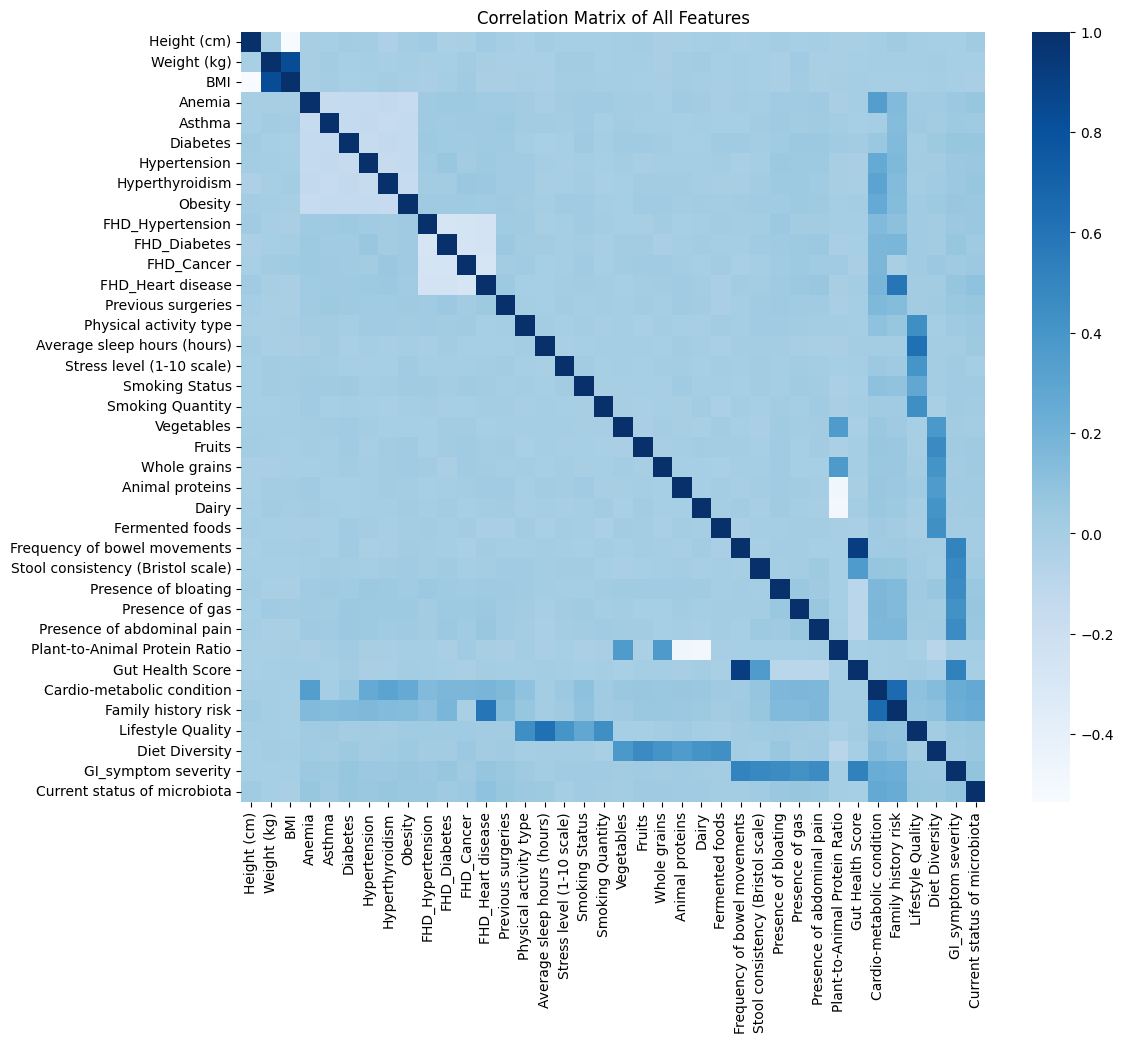

In [ ]:
correlation_matrix = X1.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues') # annot=False removes values
plt.title('Correlation Matrix of All Features')
plt.show()

### Baseline Models with SHAP based features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.61      0.38      0.47       408
           1       0.50      0.39      0.44      1022
           2       0.45      0.61      0.52      1070

    accuracy                           0.48      2500
   macro avg       0.52      0.46      0.47      2500
weighted avg       0.50      0.48      0.48      2500

Accuracy: 0.482


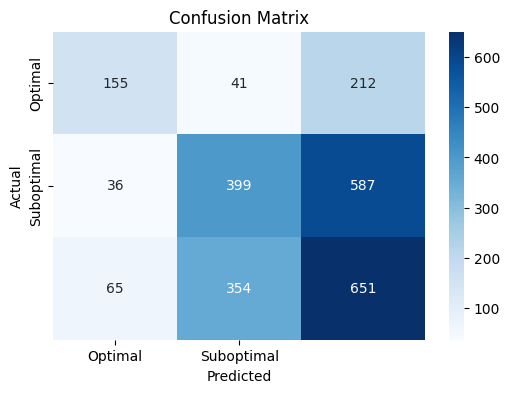

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['At risk', 'Optimal', 'Suboptimal'],
            yticklabels=['At risk', 'Optimal', 'Suboptimal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

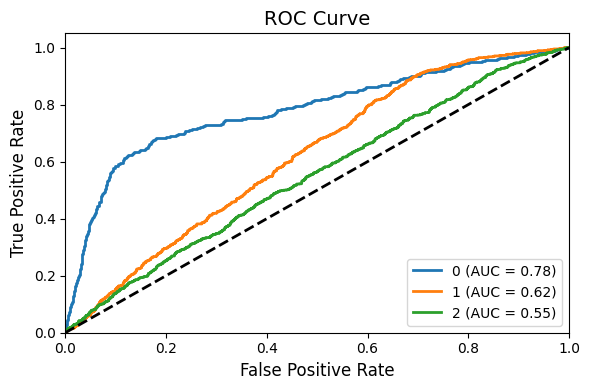

In [ ]:
plot_roc_auc(y_test, y_pred, model)

#### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=15, min_samples_split=8)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=500,
                       random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       408
           1       0.47      0.37      0.42      1022
           2       0.46      0.59      0.52      1070

    accuracy                           0.49      2500
   macro avg       0.53      0.50      0.51      2500
weighted avg       0.50      0.49      0.49      2500

Accuracy: 0.492


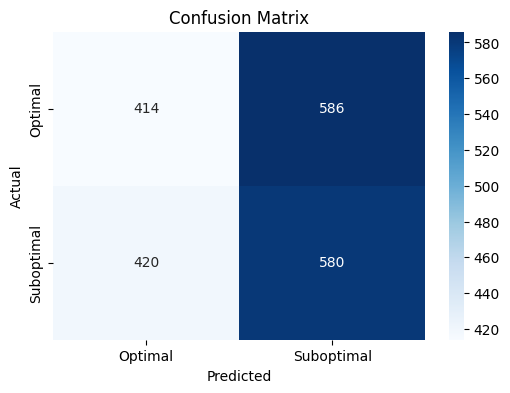

In [ ]:
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['At risk', 'Optimal', 'Suboptimal'],
            yticklabels=['At risk', 'Optimal', 'Suboptimal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

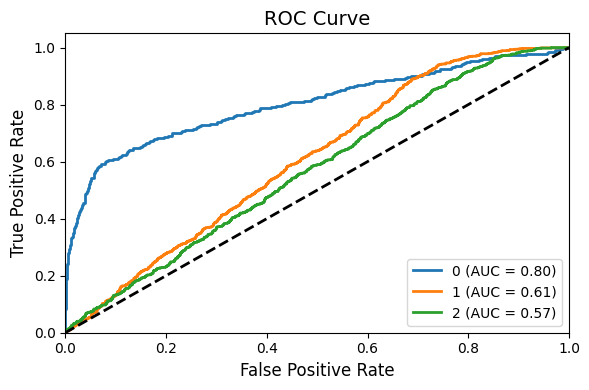

In [ ]:
plot_roc_auc(y_test, rf_predictions, rf_model)

#### XgBoost

In [ ]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_estimators=800,
    max_depth=15,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.9
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_predictions = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, xgb_predictions))
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions)}")

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       408
           1       0.49      0.49      0.49      1022
           2       0.50      0.57      0.53      1070

    accuracy                           0.53      2500
   macro avg       0.59      0.53      0.55      2500
weighted avg       0.54      0.53      0.53      2500

Accuracy: 0.5308


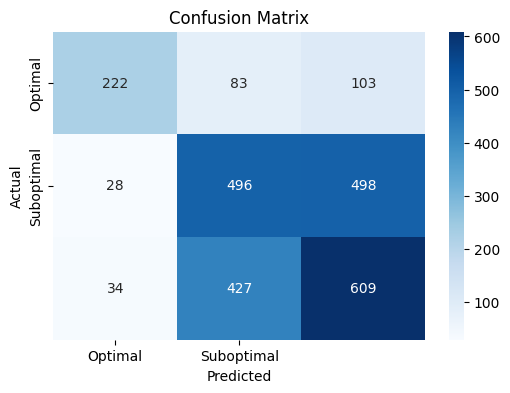

In [ ]:
cm = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['At risk', 'Optimal', 'Suboptimal'],
            yticklabels=['At risk', 'Optimal', 'Suboptimal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

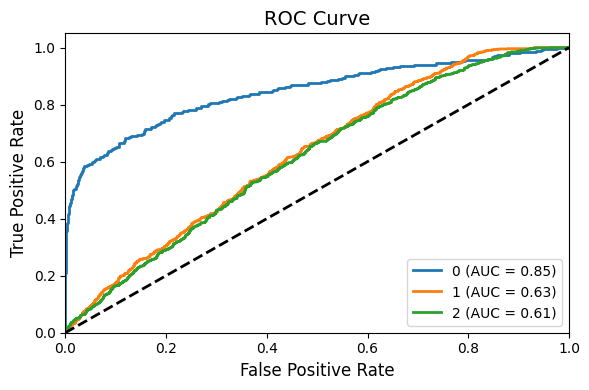

In [ ]:
plot_roc_auc(y_test, xgb_predictions, xgb_model)

### Advanced Models: ANN, LightGBM

##### Artificial Neural Networks (ANN) without SHAP

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()

model.add(Dense(512, input_dim=X_train1.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

In [ ]:
history = model.fit(X_train1, y_train1, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4632 - loss: 0.9662 - val_accuracy: 0.4870 - val_loss: 0.8876 - learning_rate: 0.0100
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5056 - loss: 0.8306 - val_accuracy: 0.5115 - val_loss: 0.8680 - learning_rate: 0.0100
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5090 - loss: 0.8084 - val_accuracy: 0.5285 - val_loss: 0.7767 - learning_rate: 0.0100
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5225 - loss: 0.7781 - val_accuracy: 0.5320 - val_loss: 0.7692 - learning_rate: 0.0100
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5358 - loss: 0.7759 - val_accuracy: 0.5205 - val_loss: 0.7905 - learning_rate: 0.0100
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5295 - loss: 0.7753 - val_accuracy: 0.5215 - val_loss: 0.7955 - learning_rate: 0.0100
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5402 - loss: 0.

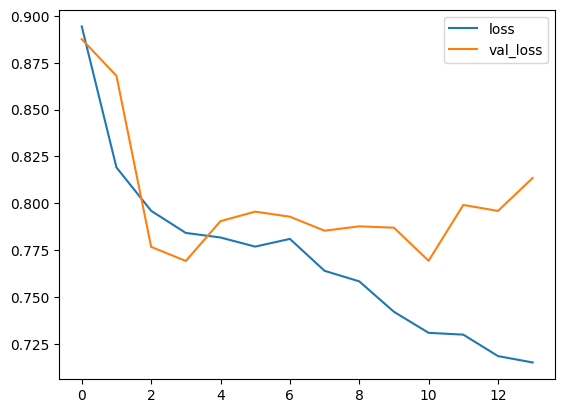

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

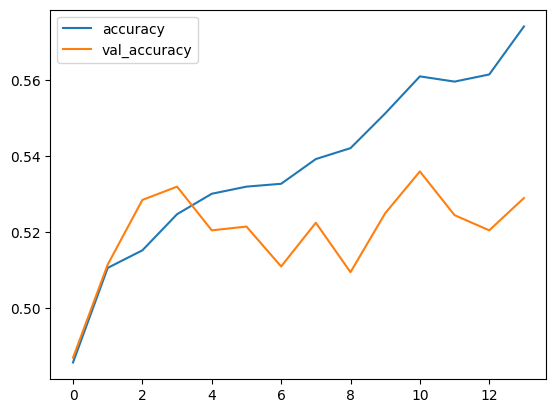

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       408
           1       0.49      0.39      0.43      1022
           2       0.50      0.57      0.53      1070

    accuracy                           0.53      2500
   macro avg       0.56      0.58      0.57      2500
weighted avg       0.53      0.53      0.52      2500



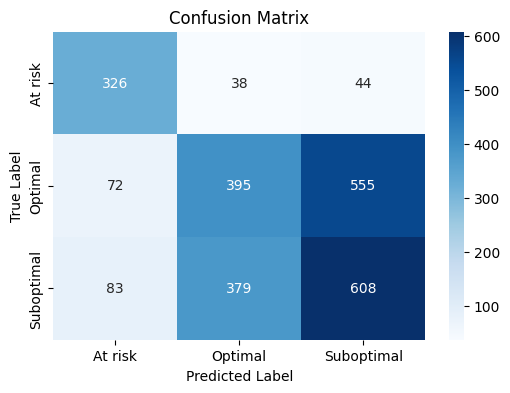

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['At risk', 'Optimal', 'Suboptimal'],
            yticklabels=['At risk', 'Optimal', 'Suboptimal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

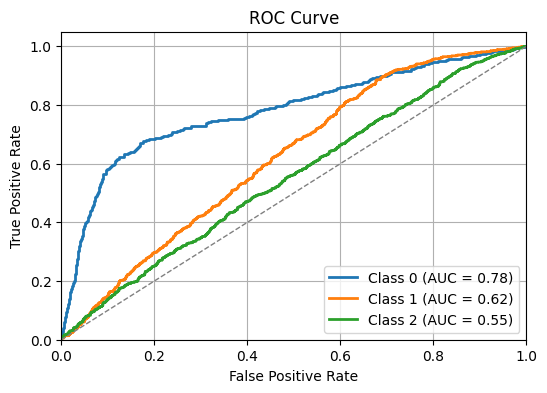

In [ ]:
y_test_bin = label_binarize(y_test1, classes=np.unique(y_test1))  # shape: (n_samples, n_classes)

n_classes = y_test_bin.shape[1]

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### LightGBM

In [ ]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

In [ ]:
import re

def clean_feature_names(df):
    df.columns = [re.sub(r'[^\w_]', '_', col) for col in df.columns]
    return df

X_train1 = clean_feature_names(X_train1)
X_test1 = clean_feature_names(X_test1)

In [ ]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

In [ ]:
train_data = lgb.Dataset(X_train1, label=y_train1)
test_data = lgb.Dataset(X_test1, label=y_test1)
val_data = lgb.Dataset(X_val1, label=y_val1, reference=train_data)

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

In [ ]:
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'valid'],
    callbacks=[
        early_stopping(stopping_rounds=10),
        log_evaluation(10)
    ]
)

Training until validation scores don't improve for 10 rounds
[10]	train's multi_logloss: 0.841921	valid's multi_logloss: 0.875091
[20]	train's multi_logloss: 0.756111	valid's multi_logloss: 0.816833
[30]	train's multi_logloss: 0.702982	valid's multi_logloss: 0.78577
[40]	train's multi_logloss: 0.664141	valid's multi_logloss: 0.7675
[50]	train's multi_logloss: 0.631775	valid's multi_logloss: 0.755405
[60]	train's multi_logloss: 0.60279	valid's multi_logloss: 0.747259
[70]	train's multi_logloss: 0.577634	valid's multi_logloss: 0.740924
[80]	train's multi_logloss: 0.555148	valid's multi_logloss: 0.736512
[90]	train's multi_logloss: 0.535204	valid's multi_logloss: 0.733041
[100]	train's multi_logloss: 0.515807	valid's multi_logloss: 0.730783
Did not meet early stopping. Best iteration is:
[100]	train's multi_logloss: 0.515807	valid's multi_logloss: 0.730783


In [ ]:
y_pred_prob = lgb_model.predict(X_test1)
y_pred = np.argmax(y_pred_prob, axis=1)

In [ ]:
print("Accuracy:", accuracy_score(y_test1, y_pred))
print("\nClassification Report:\n", classification_report(y_test1, y_pred))

Accuracy: 0.5484

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.87      0.78       408
           1       0.50      0.35      0.41      1022
           2       0.52      0.62      0.56      1070

    accuracy                           0.55      2500
   macro avg       0.57      0.61      0.58      2500
weighted avg       0.54      0.55      0.53      2500



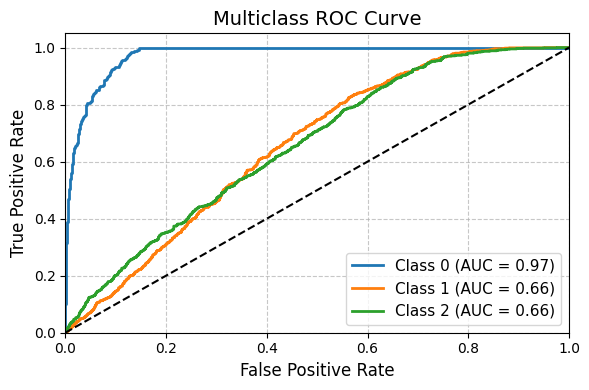

In [ ]:
y_true = y_test1
class_names = np.unique(y_true)
n_classes = len(class_names)

y_prob = lgb_model.predict(X_test1)

y_true_bin = label_binarize(y_true, classes=class_names)

plt.figure(figsize=(6, 4))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multiclass ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()